# Logistic Regression

> Sarah Braden

> Galvanize Data Science Practice Teach

> 25 April 2017

# Let's Begin!

## Logistic Regression is a:


<img style="left;" src="img/foul.png"><h2> classification algorithm </h2>

<img style="left;" src="img/goal.png"><h2> regression algorithm </h2>

## Logistic Regression is:


<img style="left;" src="img/foul.png">
<h2> an unsupervised machine learning algorithm </h2>

<img style="left;" src="img/goal.png">
<h2> a supervised machine learning algorithm </h2>



# Objectives

1. Compute predicted probabilities using scikit-learn's implementation of logistic regression
2. Compute predicted probabilities manually using the logistic function
3. Create a confusion matrix and use it to evaluate the classifier (hypothetical third objective)

# Objective Clarification
1. In practice, data scientists use tools for logistic regression like scikit-learn. Through learning to use scikit learn's implementation and get predicted probabilities you will learn about logistic regression basics. 
2. Then by learning how to compute the predicted probabilities on your own you will understand more about the underlying math behind logistic regression. This understanding will help you correctly apply the probabilities provided by logistic regression to real life business problems. 

# What problem are we trying to solve?

## Two-Class Classification

* Tumors: Benign / Malignant 
* Email: Not Spam / Spam
* Credit Card Transactions: Not Fradulent / Fradulent
* Glass Type: Window glass / regular glass

### $$y \in \{0, 1\}$$



<center><h3>0: "Negative Class" (e.g., not spam)</h3></center>

<center><h3>1: "Positive Class" (e.g., spam)</h3></center>

## Why Use Logistic Regression over Linear Regression?


* Linear Regression can output values > 1 or < 0
* Logistic Regression output: ranges from 0 to 1
* Logistic Regression output is the estimated probability that y = 1 on some input x

To the white board!


## Example
Glass identification dataset:
* types 1, 2, 3 are window glass (labeled: 0)
* types 5, 6, 7 are household glass (labeled: 1)
* inputs/features (x) are elemental abundances

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.sort_values(by='al', inplace=True)

### Let's predict household glass using only Aluminum (Al)

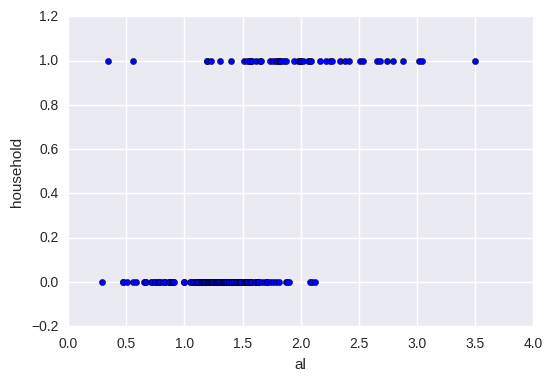

In [28]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household');

Fit a linear regression model

In [62]:
model = LinearRegression()

feature_cols = ['al']  # Aluminum is our only feature
X = glass[feature_cols]
y = glass.household
model.fit(X, y)
glass['household_pred'] = model.predict(X)

Create a scatter plot that includes the regression line

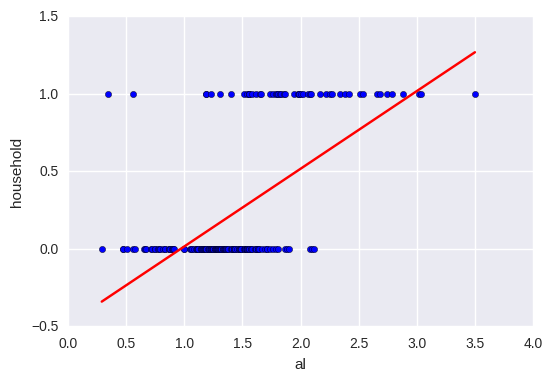

In [30]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household');

If al=3, what class do we predict?

1

Create a scatter plot that includes the regression line

<img style="left;" src="img/linear.png">

If al=1.5, what class do we predict?

0

<img style="left;" src="img/linear.png">

* We predict the 0 class for lower values of al, and the 1 class for higher values of al. 
* What's our cutoff value? 
    Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.
* Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

## Plot the class predictions

In [31]:
nums = np.array([5, 15, 8])
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

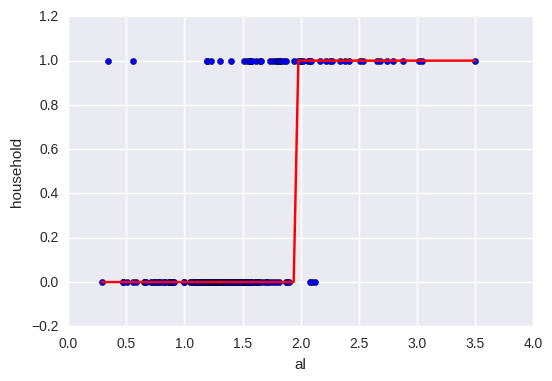

In [56]:
threshold = 0.5
glass['household_pred_class'] = np.where(glass.household_pred >= threshold, 1, 0)

plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household');

How well is this classification model based on handling the two classes?

It is modeling class 0 (window glass) well, but not modeling class 1 (household glass) very well. In the case of class 0, linear regression is just getting lucky as a classifier. Many of the class 0 and class 1 examples have the same amount of aluminium. The linear regression classifier might fool you into thinking you can model class 0 well.

What further information can using Logistic Regression provide us?

## Using Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e9)

X = glass[['al']]
y = glass.household
model.fit(X, y)
glass['household_pred_class'] = model.predict(X)

## Plot the class predictions

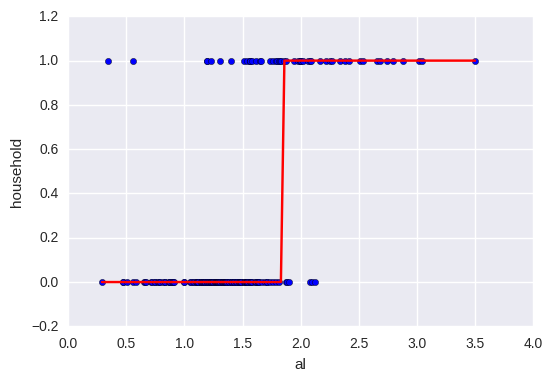

In [144]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household');

Wait a second!

Wait a second! This looks just like the predictions we got with Linear Regression! The default decision threshold used to separate the probabilities calculated by Logistic Regression into class predictions is 0.5 in scikitlearn. This is the same as what we chose for our Linear Regression example above. But let's dig deeper into the calculations behind Logistic Regression.

## Get the predicted probabilites of class 1
We can look at the predicted probabilities instead of just the class predictions. This helps us understand how confident we are in a given prediction.

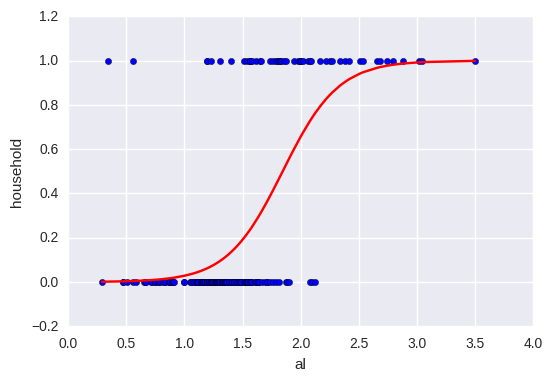

In [145]:
glass['household_pred_prob'] = model.predict_proba(X)[:, 1]

plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household');

## Examine some example predictions
For different values of x (aluminum)

In [39]:
print model.predict_proba(1)
print model.predict_proba(2)
print model.predict_proba(3)

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


The **first column** indicates the predicted probability of **class 0**.

The **second column** indicates the predicted probability of **class 1**.

## Probability and Odds

$probability =  \frac{\text{one outcome}}{\text{all outcomes}}$

$odds =  \frac{\text{one outcome}}{\text{all other outcomes}}$

$odds =  \frac{probability}{1 - probability}$

$probability =  \frac{odds}{1 + odds}$

Examples:

    Dice roll of 1: probability = 1/6, odds = 1/5
    Even dice roll: probability = 3/6, odds = 3/3 = 1
    Dice roll less than 5: probability = 4/6, odds = 4/2 = 2


## Logistic Regression is what exactly?

**Linear regression**: continuous response is modeled as a linear combination of the features:
$$y=β_0+β_1x$$

**Logistic regression**: log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
$$\log(\frac{p}{1−p})=β_0+β_1x$$

This is called the **logit function**.

The equation can be rearranged into the **logistic function**:
$$probability=\frac{e^{β_0+β_1x}}{1+e^{β_0+β_1x}}$$

### Logistic or Sigmoid function

<img style="float: center;" src="img/Logistic-curve.svg.png">

The logistic function has some nice properties:

* Output is bounded by 0 and 1


### Properties of Logistic Regression
* Logistic regression outputs the probabilities of a specific class
* These probabilities can be converted into class predictions
* Decision threshold for the classes is usually 0.5, but it is up to you!

### Interpreting Logistic Regression Coefficients
<img style="float: center;" src="img/predicted_probabilities.png">

Compute predicted log-odds for al=2 using the equation:

$\log(odds)=β_0+β_1x$

In [53]:
logodds = model.intercept_ + model.coef_[0] * 2
logodds

array([ 0.64722323])

Convert log-odds to odds

In [54]:
odds = np.exp(logodds)
odds

array([ 1.91022919])

Convert odds to probability

In [55]:
prob = odds / (1 + odds)
prob

array([ 0.65638445])

Check our work! Find the predicted probability for al=2 using scikit-learn's predict_proba method

In [57]:
model.predict_proba(2)[:, 1]

array([ 0.65638445])

In [146]:
# examine the coefficient for al
zip(feature_cols, model.coef_[0])

[('al', 4.1804038614510901)]

Interpretation: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.


# Final Exercise
* Use sepal length as a feature to classify a flower as either species setosa (0) or versicolor (1)
* Calculate the predicted probability for sepal length = 5.5
* Check your work using scikit-learn

In [128]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.target_names)  # ['setosa', 'versicolor', 'virginica']
print list(iris.feature_names)

df = pd.DataFrame(iris.data, columns=list(iris.feature_names))
df['species'] = iris.target
df.sort_values(by='sepal length (cm)', inplace=True)

df = df[df.species < 2]  # Only want 2 class problem

x = df[['sepal length (cm)']].values  # only take the first feature
y = df.species.values

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


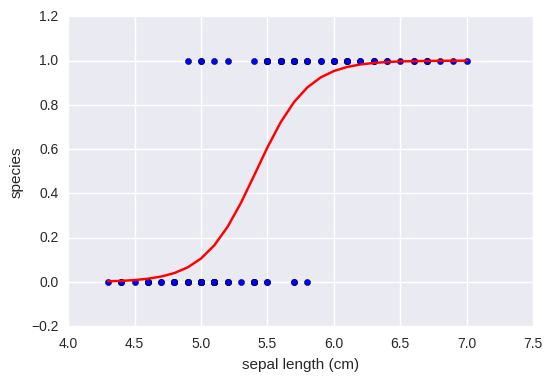

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e9)

model.fit(x, y)
species_predict = model.predict(x)

species_probability = model.predict_proba(x)[:, 1]

plt.scatter(x[:, 0], y)  # just plot the first feature
plt.plot(x[:, 0], species_probability, color='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('species');

Compute predicted log-odds for septal length = 5.5 using the equation: $\log(odds)=β_0+β_1x$

In [131]:
logodds = model.intercept_ + model.coef_[0] * 5.5
logodds

array([ 0.44038197])

In [132]:
odds = np.exp(logodds)
odds

array([ 1.55330043])

In [133]:
prob = odds / (1 + odds)
prob

array([ 0.60835004])

In [136]:
model.predict_proba(5.5)[:, 1]

array([ 0.60835004])

#### Resources Used
* Machine Learning - Professor Andrew Ng Stanford University offered a free, online machine learning class in Fall 2011, taught by Prof. Andrew Ng. http://ml-class.org
* Data School: http://www.dataschool.io/guide-to-logistic-regression/
* http://scikit-learn.org/stable/